In [1]:
# SUMMARIZATION MODELS COMPARISON
# This code shows implementations of different summarization models and how to compare them with a T5 model

import torch
import numpy as np
import pandas as pd
from transformers import (
    T5ForConditionalGeneration, T5Tokenizer,
    BartForConditionalGeneration, BartTokenizer,
    PegasusForConditionalGeneration, PegasusTokenizer,
    GPT2LMHeadModel, GPT2Tokenizer,
    pipeline
)
from datasets import load_dataset
from rouge_score import rouge_scorer
import matplotlib.pyplot as plt
from tqdm import tqdm


In [2]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lex_rank import LexRankSummarizer

def telugu_lexrank_summarize(text, num_sentences=2):
    # Initialize parser (using dummy tokenizer since Sumy doesn't support Telugu directly)
    parser = PlaintextParser.from_string(text, Tokenizer("english"))  # Workaround
    
    # Initialize LexRank summarizer
    summarizer = LexRankSummarizer()
    summary = summarizer(parser.document, num_sentences)
    
    return ' '.join([str(sentence) for sentence in summary])


In [3]:
valid_df=pd.read_csv(r'C:/Users/SHAM/OneDrive/miniproject/telugu_val_2024/telugu_ilsum_2024_val_with_summary.csv',encoding='utf-8')

In [4]:
text2=valid_df['Article'][0]

In [34]:
text1='హైదరాబాద్ సెంట్రల్ యూనివర్శిటీ (HCU) భూముల వివాదం రాష్ట్రవ్యాప్తంగా తీవ్ర చర్చనీయాంశంగా మారింది. యూనివర్శిటీ పరిధిలోని సుమారు 400 ఎకరాల భూమిని ప్రభుత్వ అభివృద్ధి కార్యక్రమాల కోసం టెక్నాలజీ పార్క్ నిర్మాణానికి కేటాయించనున్నట్టు సమాచారం వెలుగులోకి రాగానే  విద్యార్థులు పర్యావరణ ప్రేమికులు స్థానికులు తీవ్ర వ్యతిరేకత వ్యక్తం చేస్తున్నారు. విద్యార్థులు పెద్ద ఎత్తున ఆందోళనలకు దిగుతూ ఈ నిర్ణయం విద్యా సంస్థ భవిష్యత్తుపై ప్రభావం చూపుతుందని పేర్కొంటున్నారు. పర్యావరణ పరిరక్షణ కోణంలోనూ ఈ వివాదం కొత్త మలుపులు తిరుగుతోంది—చెట్లు నరికివేత మూగజీవాల నివాసాలు ధ్వంసం కావడం వంటి అంశాలు తీవ్ర ఆందోళనకు దారితీశాయి. ఈ తరుణంలో పలువురు సినీ ప్రముఖులు సామాజిక కార్యకర్తలు రాజకీయ నాయకులు విద్యార్థుల పోరాటానికి మద్దతు తెలుపుతూ స్పందిస్తున్నారు. ప్రజల ఒత్తిడితో ఈ అంశం సుప్రీం కోర్టు దృష్టికి వెళ్లింది. కోర్టు ప్రస్తుతానికి భూ అభివృద్ధి పనులను తాత్కాలికంగా నిలిపివేసి రాష్ట్ర ప్రభుత్వాన్ని వివరణ కోరింది. ఈ పరిణామాల నేపథ్యంలో విద్యార్థుల్లో ఆందోళన ఇంకా కొనసాగుతుండగా యూనివర్శిటీ భవిష్యత్తు దిశగా సుదీర్ఘ చర్చలు పరిశీలనలు జరుగుతుండటం గమనార్హం.'

In [35]:
from indicnlp.tokenize import sentence_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

# Tokenize sentences
sentences_text2 = sentence_tokenize.sentence_split(text2, lang='te')

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# TF-IDF based summarization
X_text2 = vectorizer.fit_transform(sentences_text2)
summarized_sentences_text2 = [sentences_text2[i] for i in X_text2.sum(axis=1).A1.argsort()[-2:]]
print("TF-IDF Summary:/n", " ".join(summarized_sentences_text2))

# LexRank summarization
summary_text2 = telugu_lexrank_summarize(text2)
print("/nLexRank Summary:/n", summary_text2)

from rouge_score import rouge_scorer

# Initialize the ROUGE scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# ROUGE scores for text2 summaries
rouge_scores_text2 = []
for sent in summarized_sentences_text2:
    score_text2 = scorer.score(text2, sent)
    rouge_scores_text2.append(score_text2)

lexrank_score_text2 = scorer.score(text2, summary_text2)

print("/nROUGE scores for summarized_sentences_text2:")
for i, score in enumerate(rouge_scores_text2):
    print(f"Sentence {i+1}: {score}")

print("/nROUGE score for LexRank summary_text2:")
print(lexrank_score_text2)

TF-IDF Summary:/n అయితే మృణాల్ ఉండటం వల్ల సినిమా రేంజ్ కచ్చితంగా పెరుగుతుందని నిర్మాతలు, సినిమా టీం భావిస్తున్నారట. అంతేకాదు. . దసరా తర్వాత తన ప్రతి సినిమా పాన్ ఇండియా లెవల్లో ఉండాలని ఫిక్స్ అయిన నాని తన 30వ సినిమా కూడా నేషనల్ వైడ్ రిలీజ్ ప్లాన్ చేస్తున్నాడట. కానీ ఈమె మాత్రం చాలా ఆలోచించి కథ విషయంలో సంతృప్తి చెందిన తర్వాత మాత్రమే నాని 30వ సినిమాకు ఓకే చెప్పింది అంటూ సమాచారం అందుతోంది తెలుగు లో మృణాల్ కి ఇది రెండవ సినిమానే. . అయినా కూడా ఏకంగా కోటి రూపాయల పారితోషికంను తీసుకుంటుందని నిర్మాతలు కూడా ఆమెకు అంత ఇచ్చేందుకు వార్తలు వస్తున్నాయి.
/nLexRank Summary:/n ఇక ఈ సినిమా లో నానికి జోడీగా సీతారామం ముద్దుగుమ్మ మృణాల్ ఠాకూర్ నటించబోతున్నట్లుగా కూడా అధికారికంగా ప్రకటన వచ్చింది. Photo Instagram ఇక ఆమె సినీ కెరీర్ విషయానికి వస్తే.. మృణాల్ ఠాకూర్ 2014లో విడుదలైన మరాఠీ చిత్రం, విట్టి దండుతో సినీ రంగ ప్రవేశం చేశారు.
/nROUGE scores for summarized_sentences_text2:
Sentence 1: {'rouge1': Score(precision=1.0, recall=0.043478260869565216, fmeasure=0.08333333333333333), 'rouge2': Score(precision=0.0, re

In [36]:
import torch
from transformers import T5Tokenizer, T5ForConditionalGeneration
import pandas as pd

# Constants for your model
EXTRACTIVE_SUMMARY_LENGTH = 600  # Input length
ABSTRACTIVE_SUMMARY_LENGTH = 50  # Output length

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [37]:

# Load the tokenizer 
tokenizer = T5Tokenizer.from_pretrained("tokenizer_epoch25")

# Initialize the model architecture (same as used during training)
model = T5ForConditionalGeneration.from_pretrained("google/mt5-small").to(device)

# Load the saved weights from the best model file
# Note: This loads just the state_dict, not the full checkpoint with optimizer state
model.load_state_dict(torch.load("best_telugu_summarization_model.pt"))


You are using a model of type mt5 to instantiate a model of type t5. This is not supported for all configurations of models and can yield errors.


<All keys matched successfully>

In [38]:

# 3. Inference Functions
def generate_summary(model, tokenizer, text, max_length=ABSTRACTIVE_SUMMARY_LENGTH):
    model.eval()
    
    inputs = tokenizer.encode_plus(
        text,
        max_length=EXTRACTIVE_SUMMARY_LENGTH,
        padding='max_length',
        truncation=True,
        return_tensors="pt"
    ).to(device)
    
    summary_ids = model.generate(
        input_ids=inputs['input_ids'],
        attention_mask=inputs['attention_mask'],
        max_length=max_length,
        num_beams=4,
        early_stopping=True
    )
    
    return tokenizer.decode(summary_ids[0], skip_special_tokens=True, clean_up_tokenization_spaces=True)


In [43]:
summary2=generate_summary(model,tokenizer,text1,max_length=90)

In [44]:
summary2='Hyderabad యూనివర్శిటీ పరిధిలోని సుమారు 400 ఎకరాల భూమిని ప్రభుత్వ అభివృద్ధి కార్యక్రమాల కోసం టెక్నాలజీ పార్క్ నిర్మాణానికి కేటాయించనున్నట్టు సమాచారం వెలుగులోకి రాగానే, విద్యార్థులు, పర్యావరణ ప్రేమికులు, స్థానికులు తీవ్ర వ్యతిరేకత వ్యక్తం చేస్తున్నారు.'

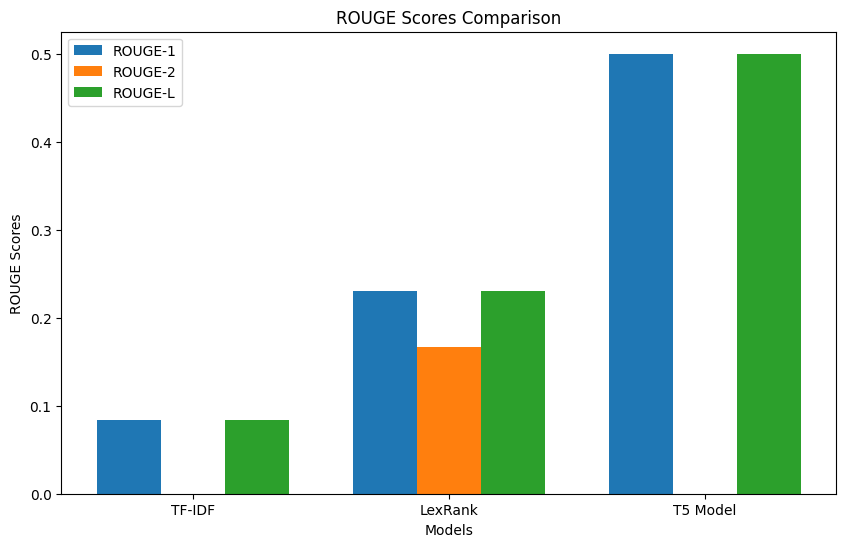

In [45]:
# Calculate ROUGE scores for all models
rouge_scores = {
    "TF-IDF": rouge_scores_text2,
    "LexRank": [lexrank_score_text2],
    "T5 Model": [scorer.score(text1, summary2)]
}

# Prepare data for plotting
models = []
rouge1_scores = []
rouge2_scores = []
rougeL_scores = []

for model_name, scores in rouge_scores.items():
    avg_rouge1 = np.mean([score['rouge1'].fmeasure for score in scores])
    avg_rouge2 = np.mean([score['rouge2'].fmeasure for score in scores])
    avg_rougeL = np.mean([score['rougeL'].fmeasure for score in scores])
    
    models.append(model_name)
    rouge1_scores.append(avg_rouge1)
    rouge2_scores.append(avg_rouge2)
    rougeL_scores.append(avg_rougeL)

# Plot the graph
x = np.arange(len(models))
width = 0.25

plt.figure(figsize=(10, 6))
plt.bar(x - width, rouge1_scores, width, label='ROUGE-1')
plt.bar(x, rouge2_scores, width, label='ROUGE-2')
plt.bar(x + width, rougeL_scores, width, label='ROUGE-L')

plt.xlabel('Models')
plt.ylabel('ROUGE Scores')
plt.title('ROUGE Scores Comparison')
plt.xticks(x, models)
plt.legend()
plt.show()